## Decision Tree-Fraudcheck

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree

In [2]:
#Import Dataset
fc = pd.read_csv('Fraud_check.csv')
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
fc.shape


(600, 6)

In [5]:
fc.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
fc.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fc=pd.get_dummies(fc,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
fc

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1

In [8]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
fc1=fc.copy()
fc1['taxable_category'] = pd.cut(x = fc1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
fc1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxable_category
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [9]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fc1["taxable_category"] = pd.cut(fc1["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [10]:
fc1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxable_category
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [11]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
fc2 = pd.get_dummies(fc1,columns = ["taxable_category"],drop_first=True)

In [12]:
fc2

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxable_category_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [13]:
colnames = list(fc.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES']

In [14]:
x = fc2.drop(['taxable_category_Good'],axis=1)
y = fc2['taxable_category_Good']

In [15]:
x

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: taxable_category_Good, Length: 600, dtype: uint8

In [17]:
#Splitting data into training and testing data set
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=40)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
ypred =dtr.predict(xtest)
ypred

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

# Model Evaluation

In [20]:
from sklearn.metrics import class_likelihood_ratios,confusion_matrix

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       140

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [22]:
confusion_matrix(ytest,ypred)

array([[ 40,   0],
       [  0, 140]], dtype=int64)

In [23]:
print('Training accuracy: ', dtr.score(xtrain,ytrain))
print('Testing Accuracy: ', dtr.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [24]:
x.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

In [25]:
from sklearn import tree

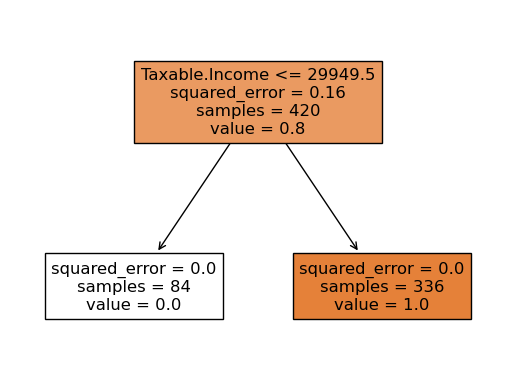

In [26]:
tree.plot_tree(dtr,feature_names=x.columns,class_names= fc2['taxable_category_Good'].unique(), filled=True)
plt.show()

In [27]:
dtr.feature_importances_

array([1., 0., 0., 0., 0., 0., 0.])

# CART

In [28]:
dtc = DecisionTreeClassifier(criterion='gini')

In [29]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       140

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [31]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 1.0)

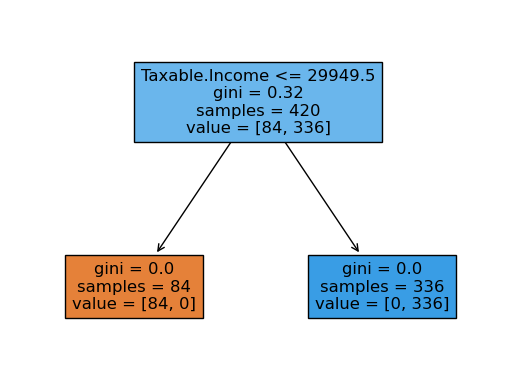

In [32]:
tree.plot_tree(dtc,feature_names=x.columns,filled=True)
plt.show()

# Decision Tree Regression 

In [33]:
#Decision tree regression
from sklearn.tree import DecisionTreeRegressor

In [34]:
array = fc.values
X = array [:,0:3]
y = array [:,3]

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, random_state=40)

In [36]:
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [37]:
#Find the accuracy
model.score(Xtest,ytest)

-1.041026698278528

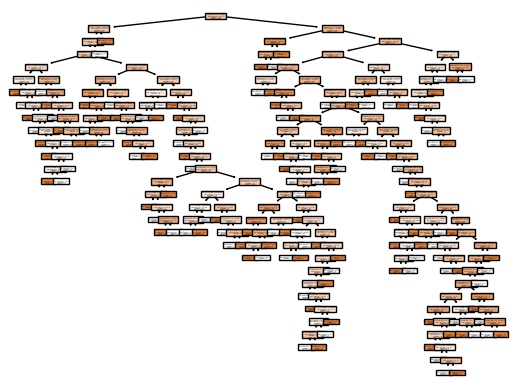

In [38]:
tree.plot_tree(model, feature_names=x.columns, filled=True)
plt.show()